In [2]:
import numpy as np
from keras.layers import Embedding
from keras.initializers import Constant
from keras.models import Model
from keras.layers import Input, Dense, SpatialDropout1D, add, concatenate
from keras.layers import Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D, LSTM, CuDNNLSTM

LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS
MAX_SEQUENCE_LENGTH = 200
embedding_matrix = np.zeros((10**4, 100))
def build_model():
    inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
    x = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], 
                  embeddings_initializer=Constant(embedding_matrix),
                  input_length=MAX_SEQUENCE_LENGTH,
                  trainable=False)(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    x = add([x, Dense(DENSE_HIDDEN_UNITS, activation='relu')(x)])
    x = add([x, Dense(DENSE_HIDDEN_UNITS, activation='relu')(x)])
    result = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, output=result)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

__main__:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


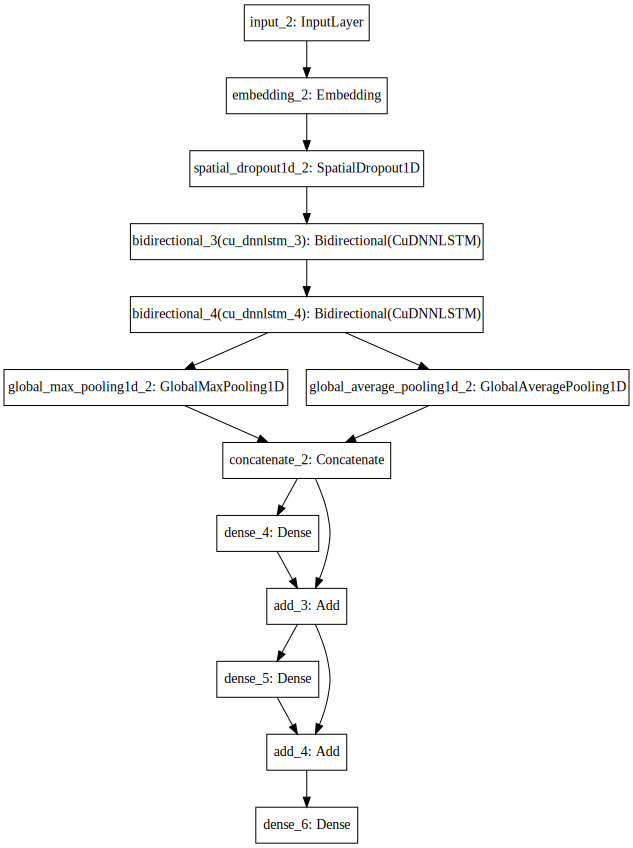

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(build_model()).create(prog='dot', format='svg'))